In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel('./rate.xlsx')

In [3]:
rate = df.iloc[:, 0]
retrain = df.iloc[:, 1:4]
unlearn = df.iloc[:, 4:]

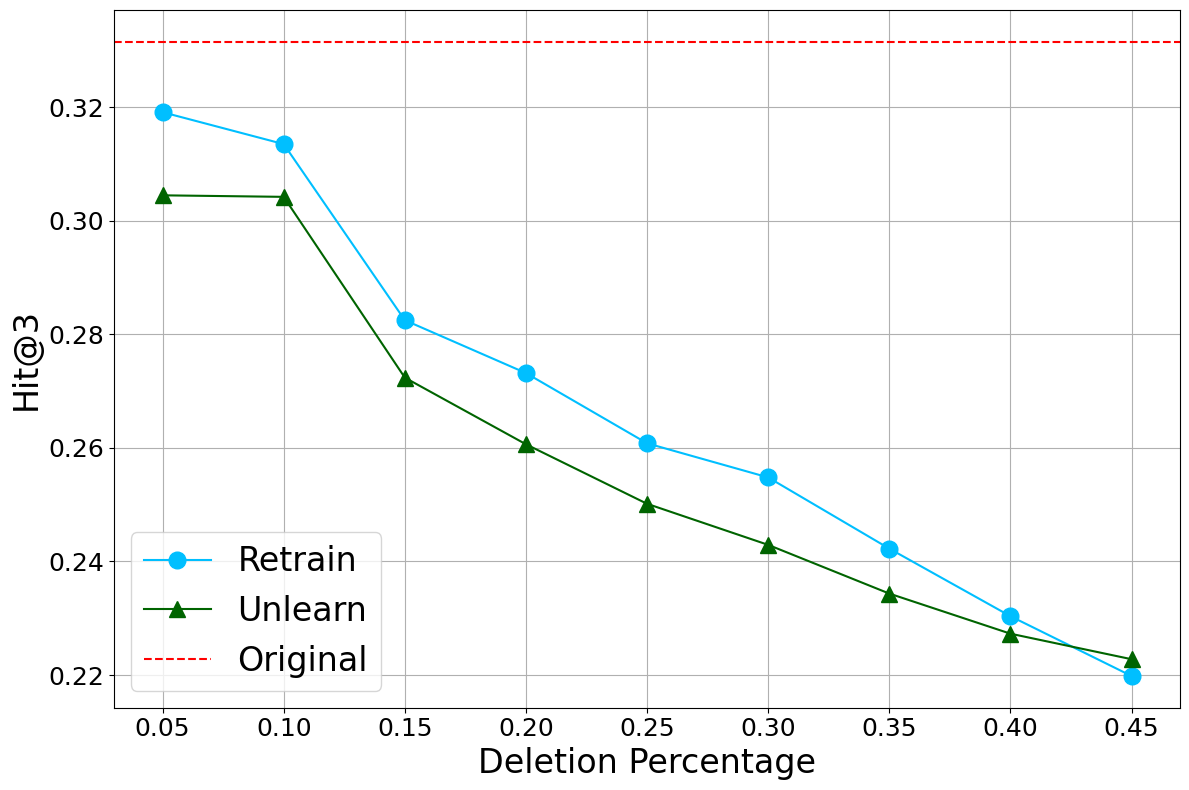

In [16]:
plt.figure(figsize=(12, 8))
train = 0.3315
plt.plot(rate, retrain.iloc[:, 1], marker='o', label='Retrain', markersize=12, color='deepskyblue')
plt.plot(rate, unlearn.iloc[:, 1], marker='^', label='Unlearn', markersize=12, color='darkgreen')
plt.axhline(y=train, color='r', linestyle='--', label='Original')
plt.xlabel('Deletion Percentage', fontsize=24)
plt.ylabel('Hit@3', fontsize=24)
plt.legend(prop={'size': 24})
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.subplots_adjust(left=0.070, right=0.80, top=0.96, bottom=0.1)
plt.tight_layout()
plt.savefig("Percentage.pdf")
plt.show()

In [2]:
model="TransD"
df_scale_005 = pd.read_excel(f'./Scale/{model}/results_Iteration_Scale_0.05_{model}.xlsx')
df_scale_025 = pd.read_excel(f'./Scale/{model}/results_Iteration_Scale_0.25_{model}.xlsx')
df_scale_05 = pd.read_excel(f'./Scale/{model}/results_Iteration_Scale_0.5_{model}.xlsx')
df_scale_1 = pd.read_excel(f'./Scale/{model}/results_Iteration_Scale_1.0_{model}.xlsx')
df_scale_10 = pd.read_excel(f'./Scale/{model}/results_Iteration_Scale_10.0_{model}.xlsx')

In [3]:
params_scale_005 = df_scale_005.iloc[:, 2]
params_scale_025 = df_scale_025.iloc[:, 2]
params_scale_05 = df_scale_05.iloc[:, 2]
params_scale_1 = df_scale_1.iloc[:, 2]
params_scale_10 = df_scale_10.iloc[:, 2]

results_scale_005 = df_scale_005.iloc[:, 5:]
results_scale_025 = df_scale_025.iloc[:, 5:]
results_scale_05 = df_scale_05.iloc[:, 5:]
results_scale_1 = df_scale_1.iloc[:, 5:]
results_scale_10 = df_scale_10.iloc[:, 5:]

params_scale_005 = params_scale_005.groupby(np.arange(len(params_scale_005)) // 5).mean()
mean_results_005 = results_scale_005.groupby(np.arange(len(results_scale_005)) // 5).mean()
std_error_005 = results_scale_005.groupby(np.arange(len(results_scale_005)) // 5).std()
params_scale_025 = params_scale_025.groupby(np.arange(len(params_scale_025)) // 5).mean()
mean_results_025 = results_scale_025.groupby(np.arange(len(results_scale_025)) // 5).mean()
std_error_025 = results_scale_025.groupby(np.arange(len(results_scale_025)) // 5).std()
params_scale_05 = params_scale_05.groupby(np.arange(len(params_scale_05)) // 5).mean()
mean_results_05 = results_scale_05.groupby(np.arange(len(results_scale_05)) // 5).mean()
std_error_05 = results_scale_05.groupby(np.arange(len(results_scale_05)) // 5).std()
params_scale_1 = params_scale_1.groupby(np.arange(len(params_scale_1)) // 5).mean()
mean_results_1 = results_scale_1.groupby(np.arange(len(results_scale_1)) // 5).mean()
std_error_1 = results_scale_1.groupby(np.arange(len(results_scale_1)) // 5).std()
params_scale_10 = params_scale_10.groupby(np.arange(len(params_scale_10)) // 5).mean()
mean_results_10 = results_scale_10.groupby(np.arange(len(results_scale_10)) // 5).mean()
std_error_10 = results_scale_10.groupby(np.arange(len(results_scale_10)) // 5).std()

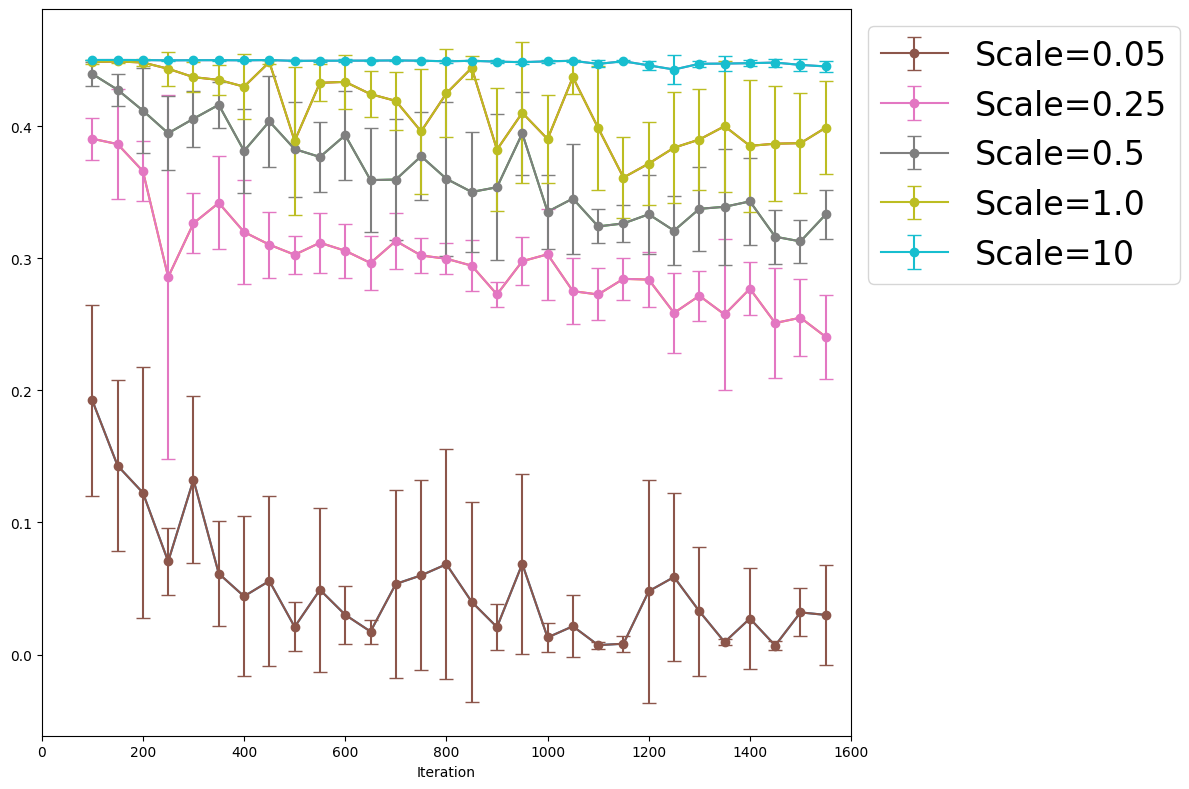

In [5]:
plt.figure(figsize=(12, 8))
y_005 = mean_results_005.iloc[:, 2]
error_005 = std_error_005.iloc[:, 2]
y_025 = mean_results_025.iloc[:, 2]
error_025 = std_error_025.iloc[:, 2]
y_05 = mean_results_05.iloc[:, 2]
error_05 = std_error_05.iloc[:, 2]
y_1 = mean_results_1.iloc[:, 2]
error_1 = std_error_1.iloc[:, 2]
y_10 = mean_results_10.iloc[:, 2]
error_10 = std_error_10.iloc[:, 2]

plt.plot(params_scale_005, y_005)
plt.plot(params_scale_025, y_025)
plt.plot(params_scale_05, y_05)
plt.plot(params_scale_1, y_1)
plt.plot(params_scale_10, y_10)

plt.errorbar(params_scale_005, y_005, yerr=error_005, fmt='-o', capsize=5, label='Scale=0.05')
plt.errorbar(params_scale_025, y_025, yerr=error_025, fmt='-o', capsize=5, label='Scale=0.25')
plt.errorbar(params_scale_05, y_05, yerr=error_05, fmt='-o', capsize=5, label='Scale=0.5')
plt.errorbar(params_scale_1, y_1, yerr=error_1, fmt='-o', capsize=5, label='Scale=1.0')
plt.errorbar(params_scale_10, y_10, yerr=error_10, fmt='-o', capsize=5, label='Scale=10')

plt.xlim(0, 1600)
plt.xlabel('Iteration')
# plt.ylabel('Hit@10')
# plt.legend(prop={'size': 24})
# plt.subplots_adjust(left=0.070, right=0.98, top=0.96, bottom=0.1)
plt.legend(prop={'size': 24}, bbox_to_anchor=(1, 1), loc='upper left')
plt.subplots_adjust(left=0.070, right=0.80, top=0.96, bottom=0.1)
plt.tight_layout()
# plt.savefig(f"{model}_Iteration-Scale-ErrorBars.pdf
plt.savefig("Example.pdf")
plt.show()

In [15]:
model="TransH"
df_1 = pd.read_excel(f'./Epsilon/{model}/results_Iteration_Epsilon_1e-05_{model}.xlsx')
df_2 = pd.read_excel(f'./Epsilon/{model}/results_Iteration_Epsilon_0.0001_{model}.xlsx')
df_3 = pd.read_excel(f'./Epsilon/{model}/results_Iteration_Epsilon_0.001_{model}.xlsx')
df_4 = pd.read_excel(f'./Epsilon/{model}/results_Iteration_Epsilon_0.01_{model}.xlsx')
df_5 = pd.read_excel(f'./Epsilon/{model}/results_Iteration_Epsilon_0.1_{model}.xlsx')
df_6 = pd.read_excel(f'./Epsilon/{model}/results_Iteration_Epsilon_1.0_{model}.xlsx')

In [16]:
params_1 = df_1.iloc[:, 2]
params_2 = df_2.iloc[:, 2]
params_3 = df_3.iloc[:, 2]
params_4 = df_4.iloc[:, 2]
params_5 = df_5.iloc[:, 2]
params_6 = df_6.iloc[:, 2]

results_1 = df_1.iloc[:, 5:]
results_2 = df_2.iloc[:, 5:]
results_3 = df_3.iloc[:, 5:]
results_4 = df_4.iloc[:, 5:]
results_5 = df_5.iloc[:, 5:]
results_6 = df_6.iloc[:, 5:]

params_1 = params_1.groupby(np.arange(len(params_1)) // 5).mean()
mean_results_1 = results_1.groupby(np.arange(len(results_1)) // 5).mean()
std_error_1 = results_1.groupby(np.arange(len(results_1)) // 5).std()

params_2 = params_2.groupby(np.arange(len(params_2)) // 5).mean()
mean_results_2 = results_2.groupby(np.arange(len(results_2)) // 5).mean()
std_error_2 = results_2.groupby(np.arange(len(results_2)) // 5).std()

params_3 = params_3.groupby(np.arange(len(params_3)) // 5).mean()
mean_results_3 = results_3.groupby(np.arange(len(results_3)) // 5).mean()
std_error_3 = results_3.groupby(np.arange(len(results_3)) // 5).std()

params_4 = params_4.groupby(np.arange(len(params_4)) // 5).mean()
mean_results_4 = results_4.groupby(np.arange(len(results_4)) // 5).mean()
std_error_4 = results_4.groupby(np.arange(len(results_4)) // 5).std()

params_5 = params_5.groupby(np.arange(len(params_5)) // 5).mean()
mean_results_5 = results_5.groupby(np.arange(len(results_5)) // 5).mean()
std_error_5 = results_5.groupby(np.arange(len(results_5)) // 5).std()

params_6 = params_6.groupby(np.arange(len(params_6)) // 5).mean()
mean_results_6 = results_6.groupby(np.arange(len(results_6)) // 5).mean()
std_error_6 = results_6.groupby(np.arange(len(results_6)) // 5).std()

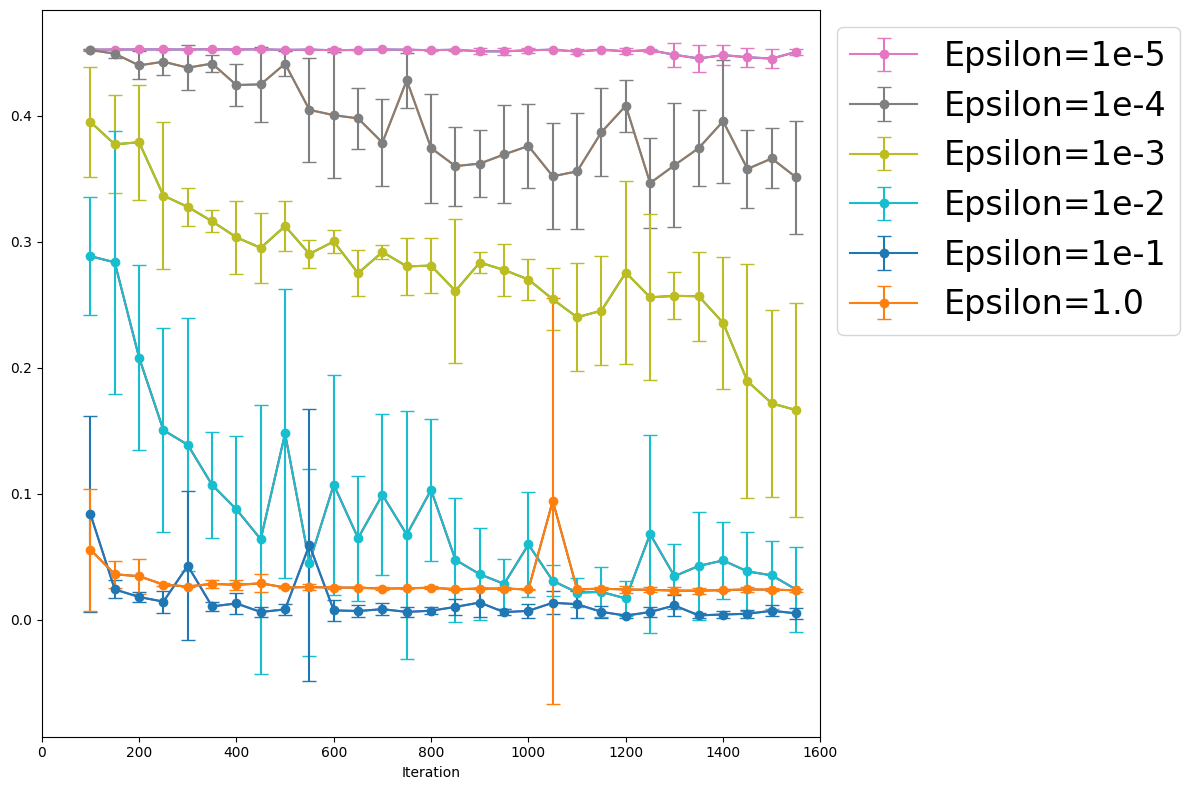

In [17]:
plt.figure(figsize=(12, 8))
y_1 = mean_results_1.iloc[:, 2]
error_1 = std_error_1.iloc[:, 2]
y_2 = mean_results_2.iloc[:, 2]
error_2 = std_error_2.iloc[:, 2]
y_3 = mean_results_3.iloc[:, 2]
error_3 = std_error_3.iloc[:, 2]
y_4 = mean_results_4.iloc[:, 2]
error_4 = std_error_4.iloc[:, 2]
y_5 = mean_results_5.iloc[:, 2]
error_5 = std_error_5.iloc[:, 2]
y_6 = mean_results_6.iloc[:, 2]
error_6 = std_error_6.iloc[:, 2]

plt.plot(params_1, y_1)
plt.plot(params_2, y_2)
plt.plot(params_3, y_3)
plt.plot(params_4, y_4)
plt.plot(params_5, y_5)
plt.plot(params_6, y_6)

plt.errorbar(params_1, y_1, yerr=error_1, fmt='-o', capsize=5, label='Epsilon=1e-5')
plt.errorbar(params_2, y_2, yerr=error_2, fmt='-o', capsize=5, label='Epsilon=1e-4')
plt.errorbar(params_3, y_3, yerr=error_3, fmt='-o', capsize=5, label='Epsilon=1e-3')
plt.errorbar(params_4, y_4, yerr=error_4, fmt='-o', capsize=5, label='Epsilon=1e-2')
plt.errorbar(params_5, y_5, yerr=error_5, fmt='-o', capsize=5, label='Epsilon=1e-1')
plt.errorbar(params_6, y_6, yerr=error_6, fmt='-o', capsize=5, label='Epsilon=1.0')

plt.xlim(0, 1600)
plt.xlabel('Iteration')
plt.legend(prop={'size': 24}, bbox_to_anchor=(1, 1), loc='upper left')
plt.subplots_adjust(left=0.070, right=0.80, top=0.96, bottom=0.1)
plt.tight_layout()
plt.savefig(f"{model}_Iteration-Epsilon-ErrorBars.pdf")
plt.show()

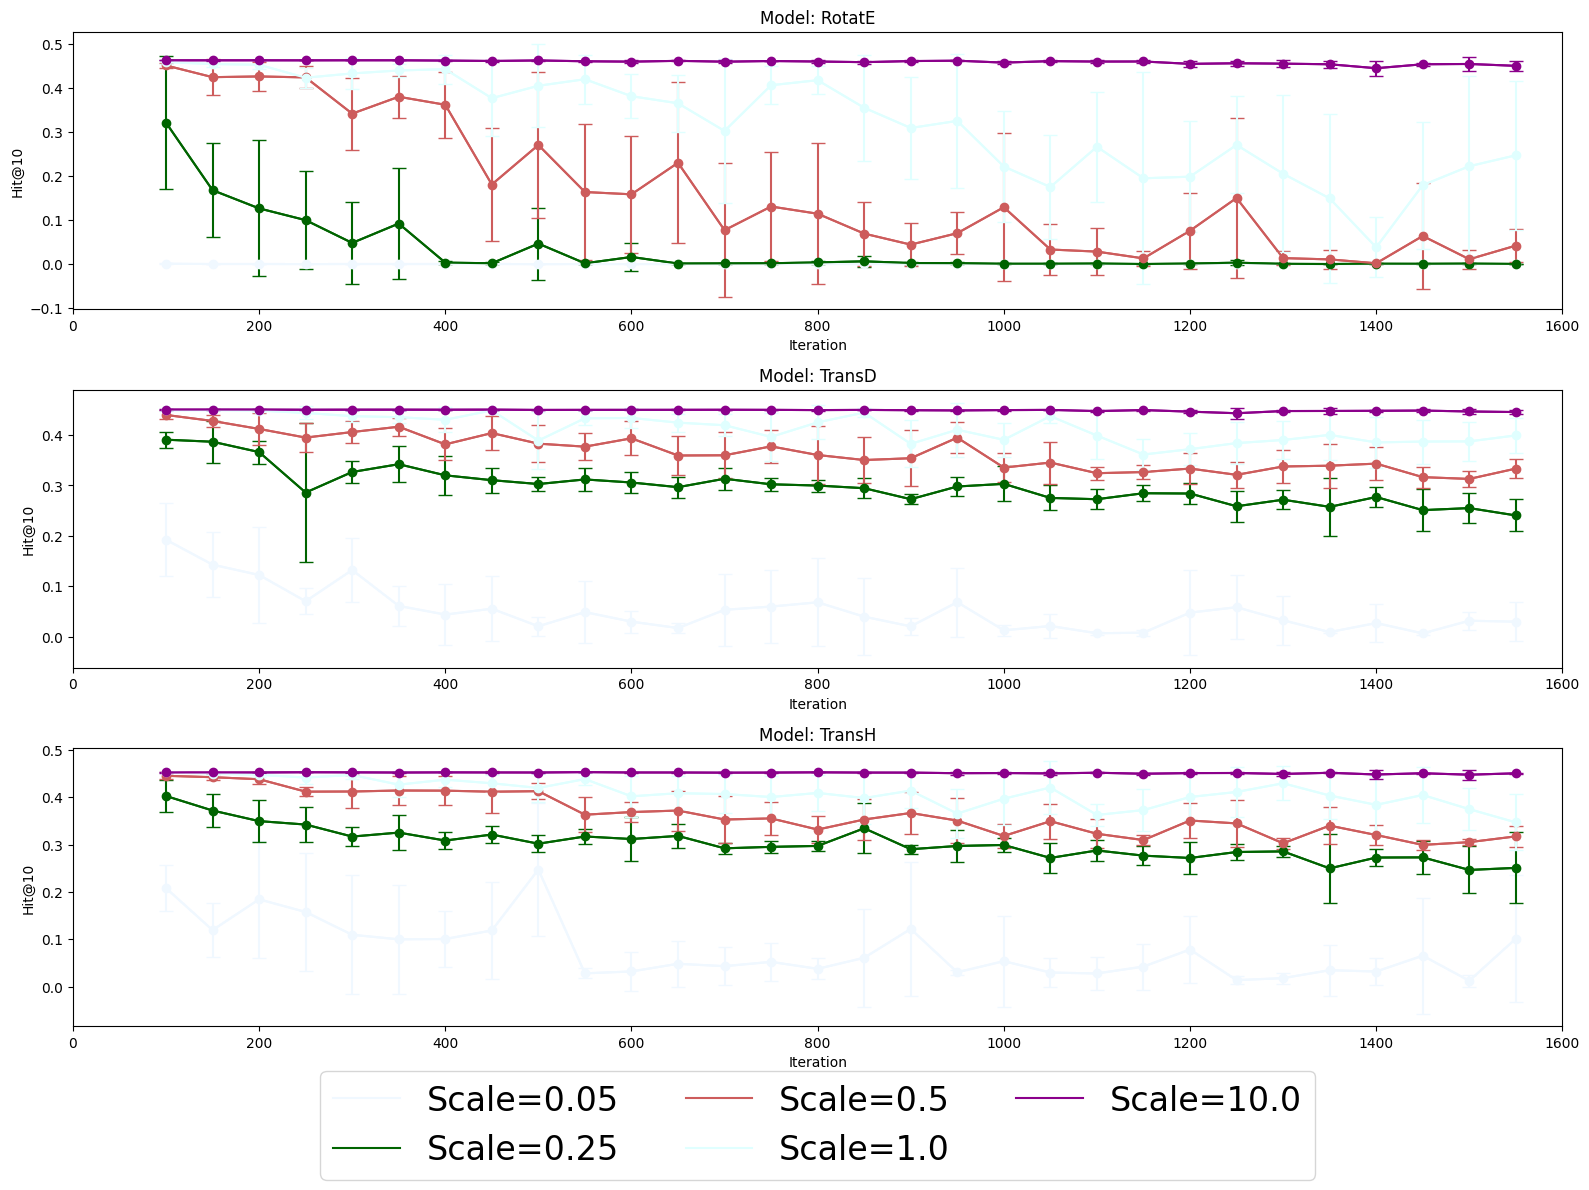

In [71]:
def plot_results(model):
    files = [
        f'./Scale/{model}/results_Iteration_Scale_0.05_{model}.xlsx',
        f'./Scale/{model}/results_Iteration_Scale_0.25_{model}.xlsx',
        f'./Scale/{model}/results_Iteration_Scale_0.5_{model}.xlsx',
        f'./Scale/{model}/results_Iteration_Scale_1.0_{model}.xlsx',
        f'./Scale/{model}/results_Iteration_Scale_10.0_{model}.xlsx'
    ]
    labels = ['Scale=0.05', 'Scale=0.25', 'Scale=0.5', 'Scale=1.0', 'Scale=10.0']
    colors = ['aliceblue', 'darkgreen', 'indianred', 'lightcyan', 'darkmagenta']
    
    for i, file in enumerate(files):
        df = pd.read_excel(file)
        params = df.iloc[:, 2]
        results = df.iloc[:, 5:]
        
        params = params.groupby(np.arange(len(params)) // 5).mean()
        mean_results = results.groupby(np.arange(len(results)) // 5).mean()
        std_error = results.groupby(np.arange(len(results)) // 5).std()
        
        y = mean_results.iloc[:, 2]
        error = std_error.iloc[:, 2]
        
        plt.plot(params, y, label=f'{labels[i]}', color=colors[i])
        plt.errorbar(params, y, yerr=error, fmt='-o', capsize=5, color=colors[i])

models = ['RotatE', 'TransD', 'TransH']

plt.figure(figsize=(16, 12))

for idx, model in enumerate(models):
    plt.subplot(3, 1, idx + 1)
    plot_results(model)
    plt.xlabel('Iteration')
    plt.ylabel('Hit@10')
    plt.title(f'Model: {model}')
    plt.xlim(0, 1600)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=3, prop={'size': 24})
plt.tight_layout()
plt.savefig("Combined_Iteration-Scale-ErrorBars.pdf")
plt.show()

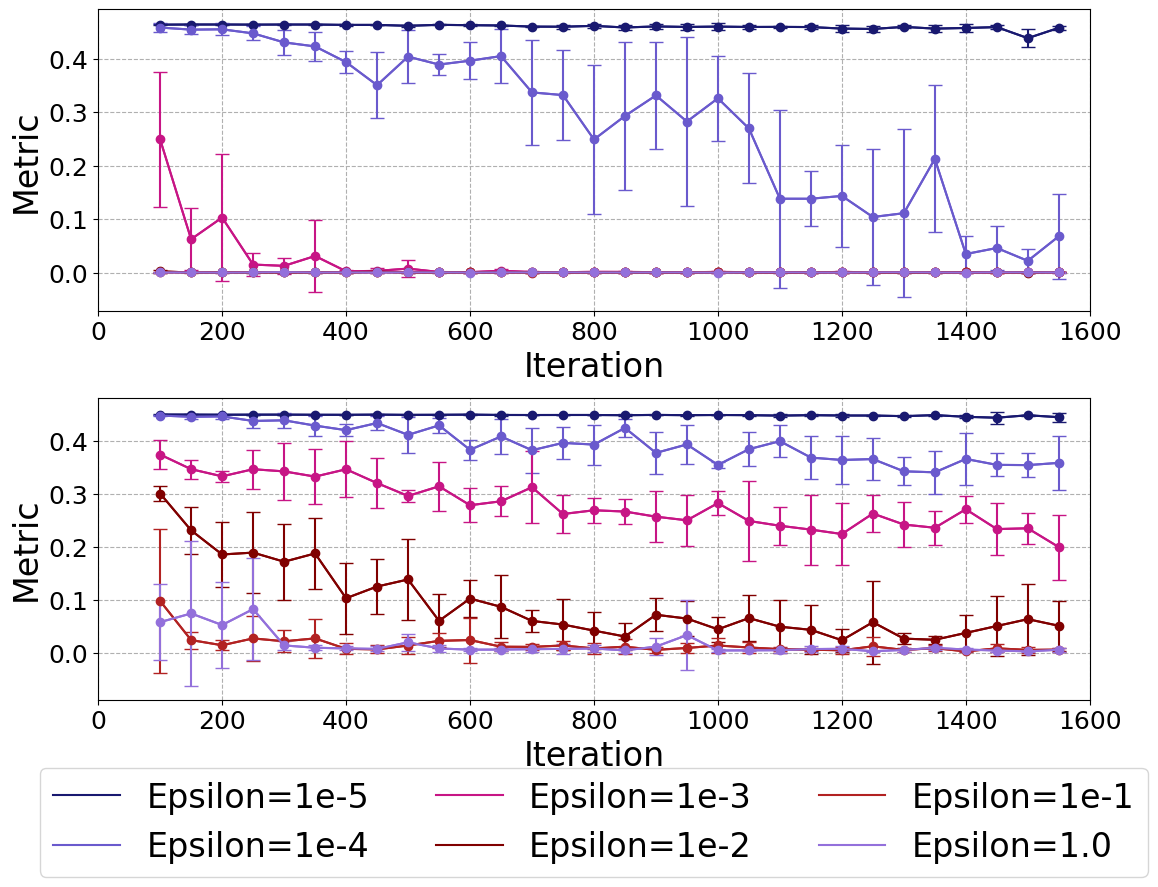

In [15]:
def plot_results(model):
    files = [
        f'./Epsilon/{model}/results_Iteration_Epsilon_1e-05_{model}.xlsx',
        f'./Epsilon/{model}/results_Iteration_Epsilon_0.0001_{model}.xlsx',
        f'./Epsilon/{model}/results_Iteration_Epsilon_0.001_{model}.xlsx',
        f'./Epsilon/{model}/results_Iteration_Epsilon_0.01_{model}.xlsx',
        f'./Epsilon/{model}/results_Iteration_Epsilon_0.1_{model}.xlsx',
        f'./Epsilon/{model}/results_Iteration_Epsilon_1.0_{model}.xlsx'
    ]
    labels = ['Epsilon=1e-5', 'Epsilon=1e-4', 'Epsilon=1e-3', 'Epsilon=1e-2', 'Epsilon=1e-1', 'Epsilon=1.0']
    colors = ['midnightblue', 'slateblue', 'mediumvioletred', 'maroon', 'firebrick', 'mediumpurple']
    
    for i, file in enumerate(files):
        df = pd.read_excel(file)
        params = df.iloc[:, 2]
        results = df.iloc[:, 5:]
        
        params = params.groupby(np.arange(len(params)) // 5).mean()
        mean_results = results.groupby(np.arange(len(results)) // 5).mean()
        std_error = results.groupby(np.arange(len(results)) // 5).std()
        
        y = mean_results.iloc[:, 2]
        error = std_error.iloc[:, 2]
        
        plt.plot(params, y, label=f'{labels[i]}', color=colors[i])
        plt.errorbar(params, y, yerr=error, fmt='-o', capsize=5, color=colors[i])

models = ['RotatE', 'TransD']
# models = ['TransH']
plt.figure(figsize=(12, 9))

for idx, model in enumerate(models):
    plt.subplot(2, 1, idx + 1)
    plot_results(model)
    plt.xlabel('Iteration', fontsize=24)
    plt.ylabel('Metric', fontsize=24)
    # plt.title(f'Model: {model}')
    plt.xlim(0, 1600)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.grid(True, linestyle='--')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.17), ncol=3, prop={'size': 24})
plt.tight_layout()

plt.savefig("Retain_Iteration-Epsilon-ErrorBars.pdf")
plt.show()

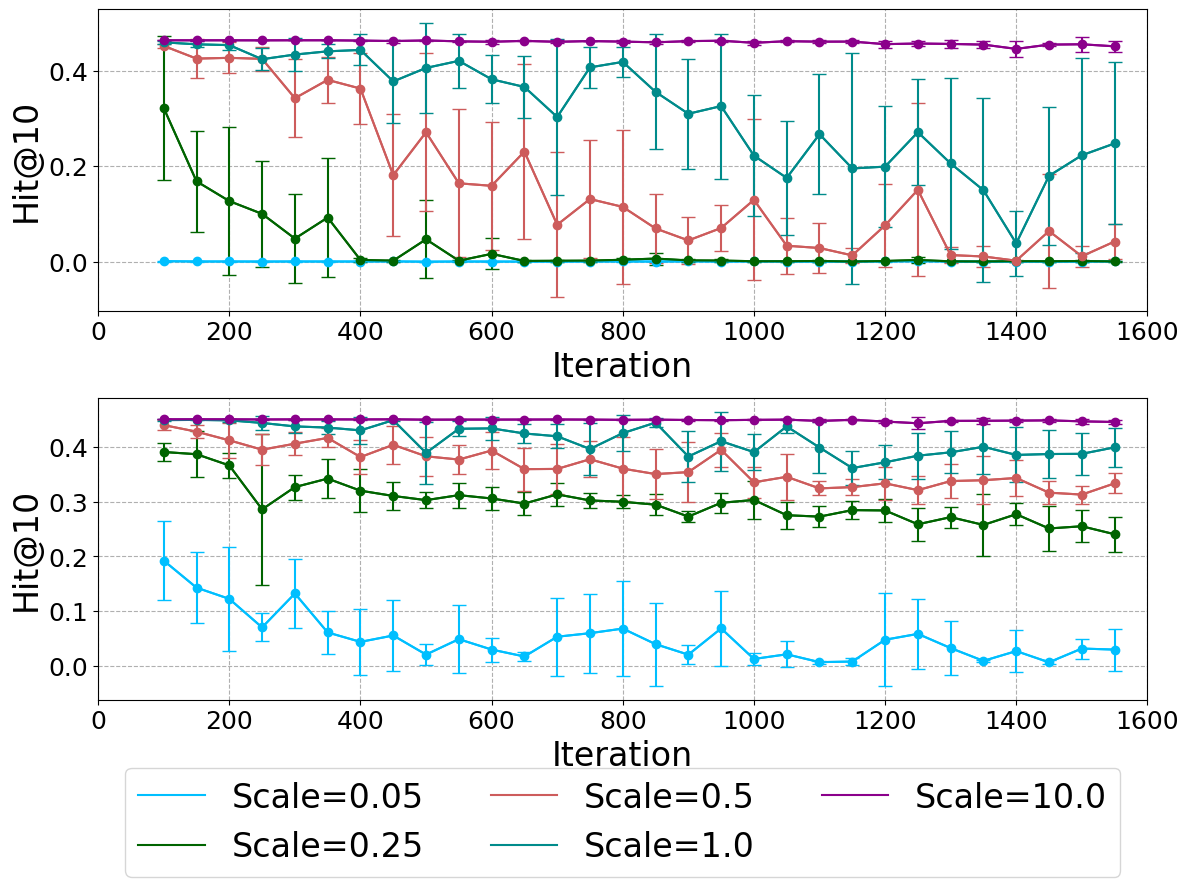

In [16]:
def plot_results(model):
    files = [
        f'./Scale/{model}/results_Iteration_Scale_0.05_{model}.xlsx',
        f'./Scale/{model}/results_Iteration_Scale_0.25_{model}.xlsx',
        f'./Scale/{model}/results_Iteration_Scale_0.5_{model}.xlsx',
        f'./Scale/{model}/results_Iteration_Scale_1.0_{model}.xlsx',
        f'./Scale/{model}/results_Iteration_Scale_10.0_{model}.xlsx'
    ]
    labels = ['Scale=0.05', 'Scale=0.25', 'Scale=0.5', 'Scale=1.0', 'Scale=10.0']
    colors = ['deepskyblue', 'darkgreen', 'indianred', 'darkcyan', 'darkmagenta']
    
    for i, file in enumerate(files):
        df = pd.read_excel(file)
        params = df.iloc[:, 2]
        results = df.iloc[:, 5:]
        
        params = params.groupby(np.arange(len(params)) // 5).mean()
        mean_results = results.groupby(np.arange(len(results)) // 5).mean()
        std_error = results.groupby(np.arange(len(results)) // 5).std()
        
        y = mean_results.iloc[:, 2]
        error = std_error.iloc[:, 2]
        
        plt.plot(params, y, label=f'{labels[i]}', color=colors[i])
        plt.errorbar(params, y, yerr=error, fmt='-o', capsize=5, color=colors[i])

models = ['RotatE', 'TransD']
# models = ['TransH']
plt.figure(figsize=(12, 9))

for idx, model in enumerate(models):
    plt.subplot(2, 1, idx + 1)
    plot_results(model)
    plt.xlabel('Iteration', fontsize=24)
    plt.ylabel('Hit@10', fontsize=24)
    # plt.title(f'Model: {model}')
    plt.xlim(0, 1600)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.grid(True, linestyle='--')
    
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.17), ncol=3, prop={'size': 24})
plt.tight_layout()

plt.savefig("Retain_Iteration-Scale-ErrorBars.pdf")
plt.show()

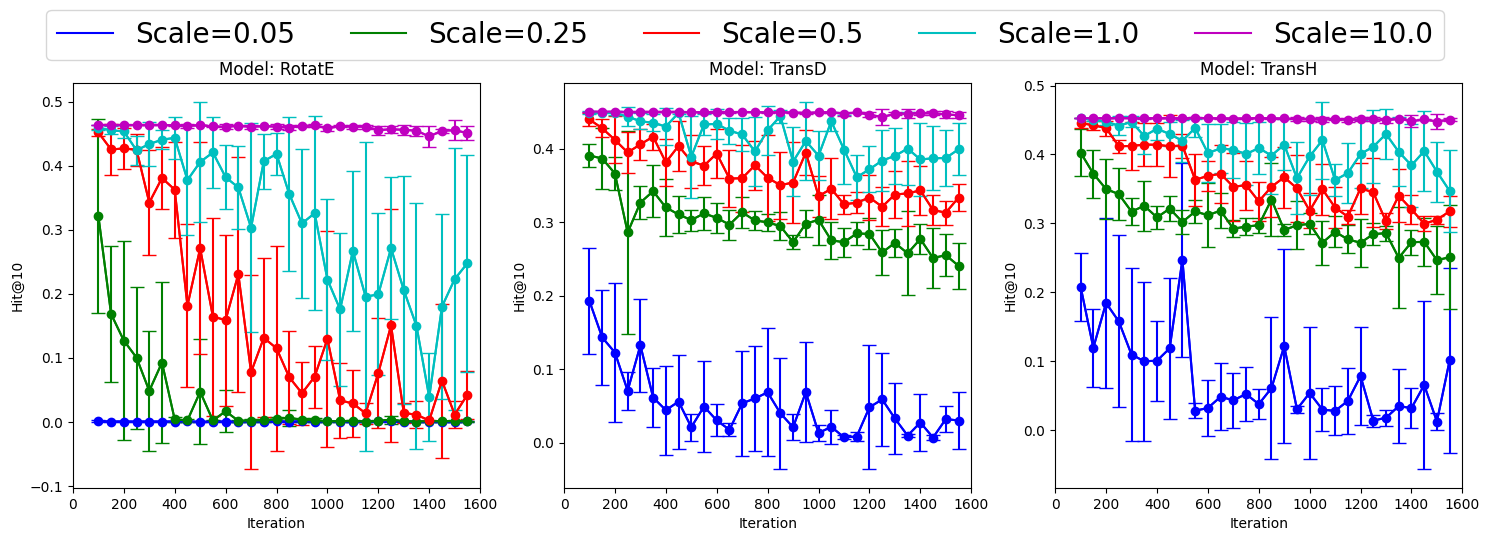

In [54]:
def plot_results(model, ax):
    files = [
        f'./Scale/{model}/results_Iteration_Scale_0.05_{model}.xlsx',
        f'./Scale/{model}/results_Iteration_Scale_0.25_{model}.xlsx',
        f'./Scale/{model}/results_Iteration_Scale_0.5_{model}.xlsx',
        f'./Scale/{model}/results_Iteration_Scale_1.0_{model}.xlsx',
        f'./Scale/{model}/results_Iteration_Scale_10.0_{model}.xlsx'
    ]
    labels = ['Scale=0.05', 'Scale=0.25', 'Scale=0.5', 'Scale=1.0', 'Scale=10.0']
    colors = ['b', 'g', 'r', 'c', 'm']
    
    for i, file in enumerate(files):
        df = pd.read_excel(file)
        params = df.iloc[:, 2]
        results = df.iloc[:, 5:]
        
        params = params.groupby(np.arange(len(params)) // 5).mean()
        mean_results = results.groupby(np.arange(len(results)) // 5).mean()
        std_error = results.groupby(np.arange(len(results)) // 5).std()
        
        y = mean_results.iloc[:, 2]
        error = std_error.iloc[:, 2]
        
        ax.plot(params, y, label=f'{labels[i]}', color=colors[i])
        ax.errorbar(params, y, yerr=error, fmt='-o', capsize=5, color=colors[i])

models = ['RotatE', 'TransD', 'TransH']
fig, axes = plt.subplots(1, 1, figsize=(15, 5))

for idx, model in enumerate(models):
    plot_results(model, axes[idx])
    axes[idx].set_xlabel('Iteration')
    axes[idx].set_ylabel('Hit@10')
    axes[idx].set_title(f'Model: {model}')
    axes[idx].set_xlim(0, 1600)

handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=5, prop={'size': 20})
plt.tight_layout()
plt.savefig("Combined_Iteration-Scale-ErrorBars.pdf")
plt.show()

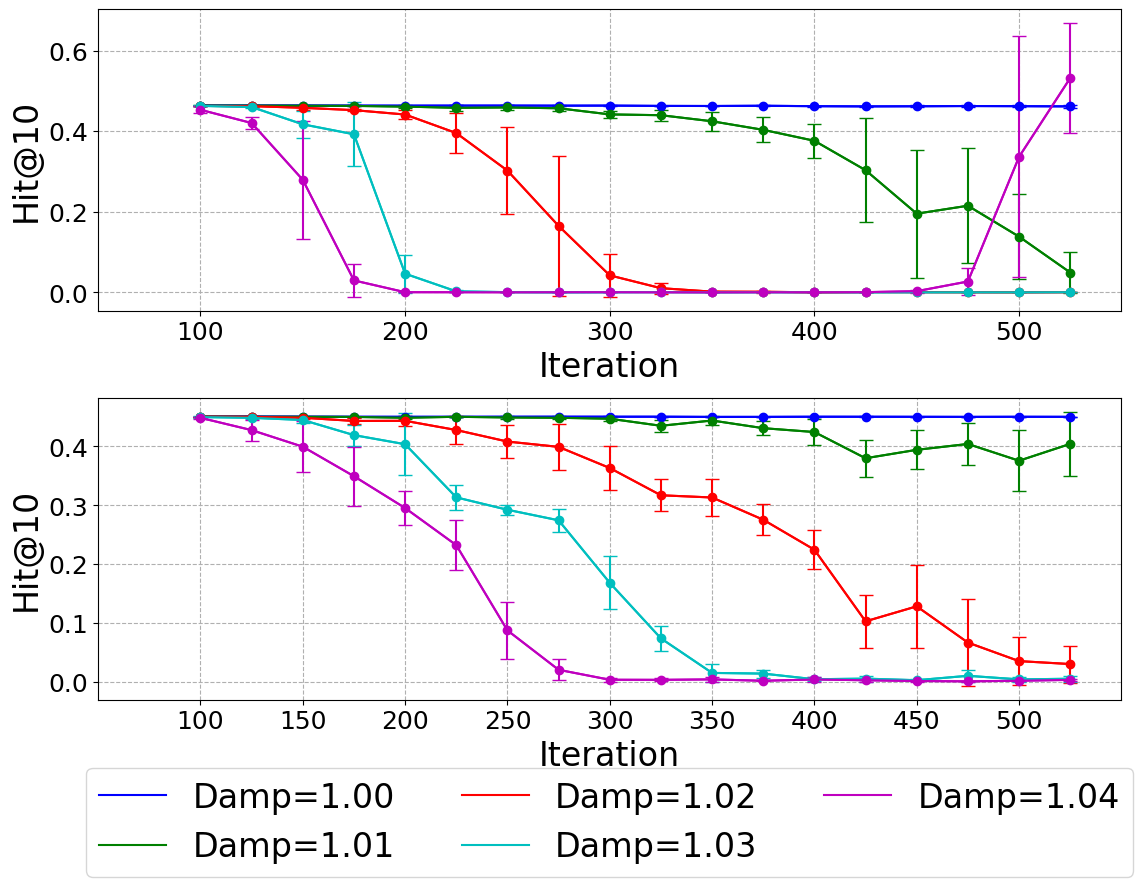

In [2]:
def plot_results(model):
    files = [
        f'./Damp/{model}/results_Iteration_Damp_0.0_{model}.xlsx',
        f'./Damp/{model}/results_Iteration_Damp_-0.01_{model}.xlsx',
        f'./Damp/{model}/results_Iteration_Damp_-0.02_{model}.xlsx',
        f'./Damp/{model}/results_Iteration_Damp_-0.03_{model}.xlsx',
        f'./Damp/{model}/results_Iteration_Damp_-0.04_{model}.xlsx'
    ]
    labels = ['Damp=1.00', 'Damp=1.01', 'Damp=1.02', 'Damp=1.03', 'Damp=1.04']
    colors = ['b', 'g', 'r', 'c', 'm']
    
    for i, file in enumerate(files):
        df = pd.read_excel(file)
        params = df.iloc[:, 2]
        results = df.iloc[:, 5:]
        
        params = params.groupby(np.arange(len(params)) // 5).mean()
        mean_results = results.groupby(np.arange(len(results)) // 5).mean()
        std_error = results.groupby(np.arange(len(results)) // 5).std()
        
        y = mean_results.iloc[:, 2]
        error = std_error.iloc[:, 2]
        
        plt.plot(params, y, label=f'{labels[i]}', color=colors[i])
        plt.errorbar(params, y, yerr=error, fmt='-o', capsize=5, color=colors[i])

models = ['RotatE', 'TransD']
# models = ['TransH']

plt.figure(figsize=(12, 9))

for idx, model in enumerate(models):
    plt.subplot(2, 1, idx + 1)
    plot_results(model)
    plt.xlabel('Iteration', fontsize=24)
    plt.ylabel('Hit@10', fontsize=24)
    # plt.title(f'Model: {model}')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.xlim(50, 550)
    plt.grid(True, linestyle='--')

plt.xticks([100, 150, 200, 250, 300, 350, 400, 450, 500])
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.17), ncol=3, prop={'size': 24})
plt.tight_layout()

# plt.savefig("Combined_Iteration-Damp-ErrorBars.pdf")
plt.savefig("Retain_Iteration-Damp-ErrorBars.pdf")
plt.show()

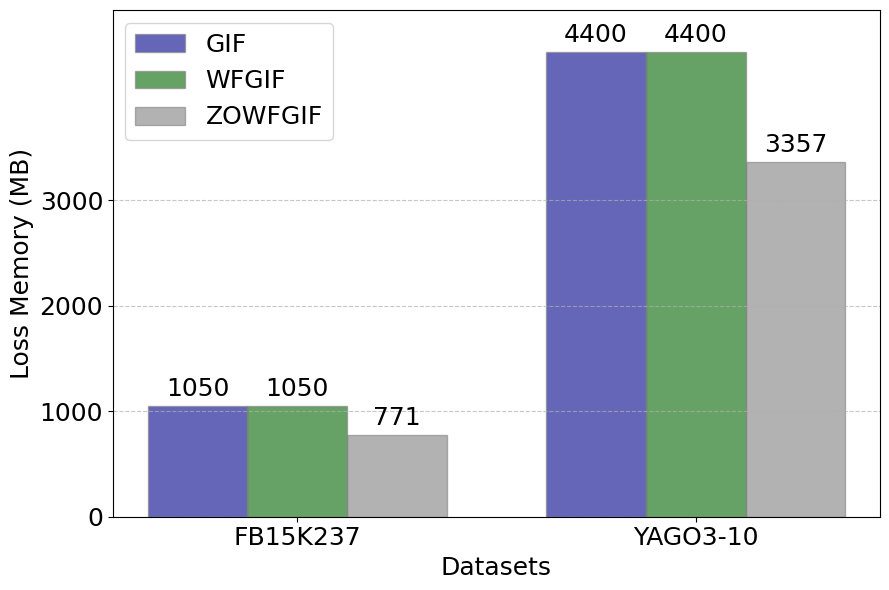

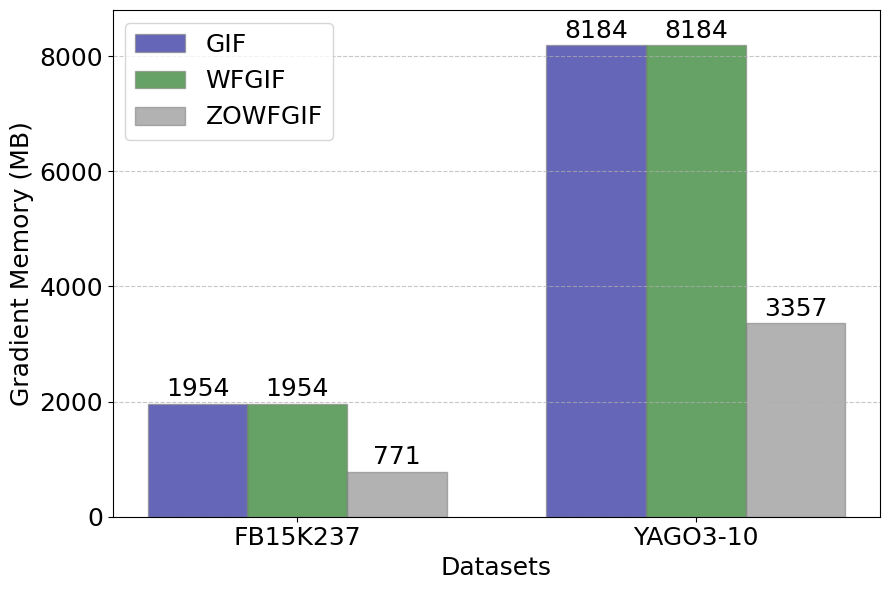

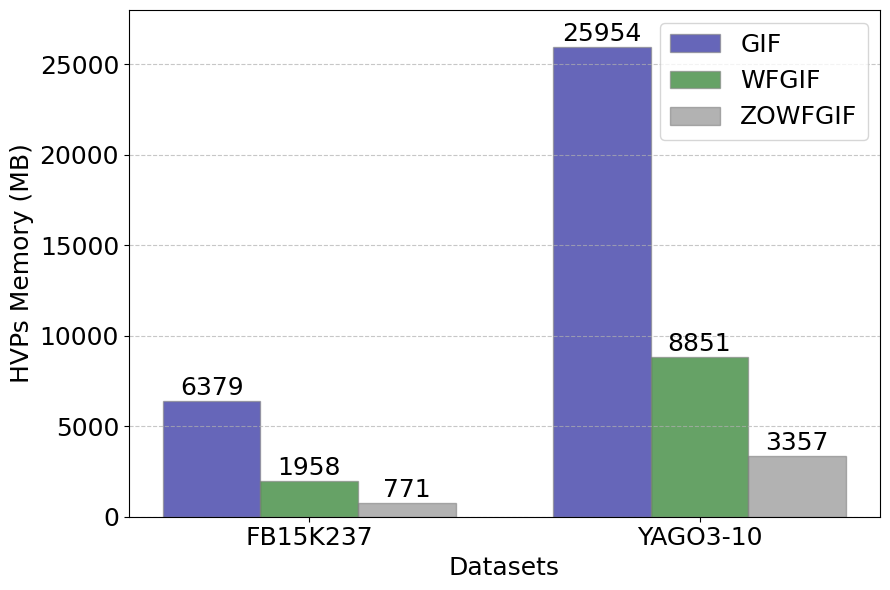

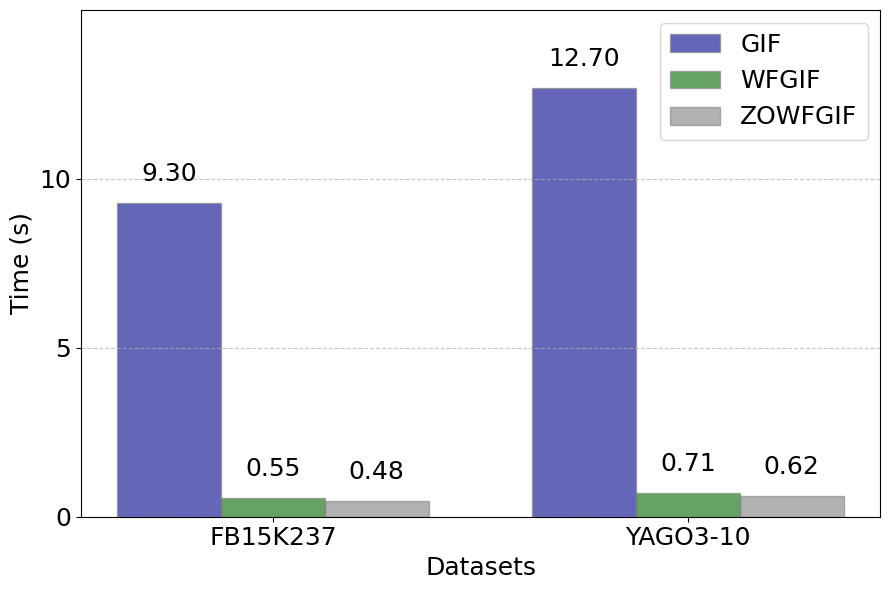

In [114]:
# 数据
datasets = ['FB15K237', 'YAGO3-10']
FB15K237_loss = [1050, 1050, 771]
YAGO3_10_loss = [4400, 4400, 3357]

data = [FB15K237_loss, YAGO3_10_loss]

bar_width = 0.25
r1 = np.arange(len(datasets))
r1 = [x - bar_width for x in r1]
r2 = np.arange(len(datasets))
r3 = [x + bar_width for x in r2]
color_alpha = 0.6

fig, ax = plt.subplots(figsize=(9, 6))

bars1 = ax.bar(r1, [FB15K237_loss[0], YAGO3_10_loss[0]], color='darkblue', alpha=color_alpha, width=bar_width, edgecolor='grey', label='GIF')
bars2 = ax.bar(r2, [FB15K237_loss[1], YAGO3_10_loss[1]], color='darkgreen', alpha=color_alpha, width=bar_width, edgecolor='grey', label='WFGIF')
bars3 = ax.bar(r3, [FB15K237_loss[2], YAGO3_10_loss[2]], color='grey', alpha=color_alpha, width=bar_width, edgecolor='grey', label='ZOWFGIF')

ax.set_ylim(0, 4800)
ax.set_xlabel('Datasets', fontsize=18)
ax.set_ylabel('Loss Memory (MB)', fontsize=18)
# ax.set_title('Loss Memory Comparison', fontsize=18)
ax.set_xticks(r2)
ax.set_xticklabels(datasets, fontsize=18)
ax.set_yticks(np.arange(0, 4000, 1000)) 
ax.set_yticklabels(np.arange(0, 4000, 1000), fontsize=18)  
ax.legend(prop={'size': 18})
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 50, int(yval), ha='center', va='bottom', fontsize=18)

plt.tight_layout()
plt.savefig('RotatE_Loss_Ablation.pdf')
plt.show()

# 数据
datasets = ['FB15K237', 'YAGO3-10']
FB15K237_grad = [1954, 1954, 771]
YAGO3_10_grad = [8184, 8184, 3357]

data = [FB15K237_grad, YAGO3_10_grad]

bar_width = 0.25
r1 = np.arange(len(datasets))
r1 = [x - bar_width for x in r1]
r2 = np.arange(len(datasets))
r3 = [x + bar_width for x in r2]
color_alpha = 0.6

fig, ax = plt.subplots(figsize=(9, 6))

bars1 = ax.bar(r1, [FB15K237_grad[0], YAGO3_10_grad[0]], color='darkblue', alpha=color_alpha, width=bar_width, edgecolor='grey', label='GIF')
bars2 = ax.bar(r2, [FB15K237_grad[1], YAGO3_10_grad[1]], color='darkgreen', alpha=color_alpha, width=bar_width, edgecolor='grey', label='WFGIF')
bars3 = ax.bar(r3, [FB15K237_grad[2], YAGO3_10_grad[2]], color='grey', alpha=color_alpha, width=bar_width, edgecolor='grey', label='ZOWFGIF')

ax.set_ylim(0, 8800)
ax.set_xlabel('Datasets', fontsize=18)
ax.set_ylabel('Gradient Memory (MB)', fontsize=18)
# ax.set_title('Gradient Memory Comparison', fontsize=18)
ax.set_xticks(r2)
ax.set_xticklabels(datasets, fontsize=18)
ax.set_yticks(np.arange(0, 8800, 2000)) 
ax.set_yticklabels(np.arange(0, 8800, 2000), fontsize=18)  
ax.legend(prop={'size': 18})
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 50, int(yval), ha='center', va='bottom', fontsize=18)

plt.tight_layout()
plt.savefig('RotatE_Gradient_Ablation.pdf')
plt.show()

# 数据
datasets = ['FB15K237', 'YAGO3-10']
FB15K237_hvps = [6379, 1958, 771]
YAGO3_10_hvps = [25954, 8851, 3357]

data = [FB15K237_grad, YAGO3_10_grad]

bar_width = 0.25
r1 = np.arange(len(datasets))
r1 = [x - bar_width for x in r1]
r2 = np.arange(len(datasets))
r3 = [x + bar_width for x in r2]
color_alpha = 0.6

fig, ax = plt.subplots(figsize=(9, 6))

bars1 = ax.bar(r1, [FB15K237_hvps[0], YAGO3_10_hvps[0]], color='darkblue', alpha=color_alpha, width=bar_width, edgecolor='grey', label='GIF')
bars2 = ax.bar(r2, [FB15K237_hvps[1], YAGO3_10_hvps[1]], color='darkgreen', alpha=color_alpha, width=bar_width, edgecolor='grey', label='WFGIF')
bars3 = ax.bar(r3, [FB15K237_hvps[2], YAGO3_10_hvps[2]], color='grey', alpha=color_alpha, width=bar_width, edgecolor='grey', label='ZOWFGIF')

ax.set_ylim(0, 28000)
ax.set_xlabel('Datasets', fontsize=18)
ax.set_ylabel('HVPs Memory (MB)', fontsize=18)
# ax.set_title('HVPs Memory Comparison', fontsize=18)
ax.set_xticks(r2)
ax.set_xticklabels(datasets, fontsize=18)
ax.set_yticks(np.arange(0, 28000, 5000)) 
ax.set_yticklabels(np.arange(0, 28000, 5000), fontsize=18)  
ax.legend(prop={'size': 18})
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 50, int(yval), ha='center', va='bottom', fontsize=18)

plt.tight_layout()
plt.savefig('RotatE_HVPs_Ablation.pdf')
plt.show()

# 数据
datasets = ['FB15K237', 'YAGO3-10']
FB15K237_time = [9.3, 0.55, 0.48]
YAGO3_10_time = [12.7, 0.71, 0.62]

data = [FB15K237_grad, YAGO3_10_grad]

bar_width = 0.25
r1 = np.arange(len(datasets))
r1 = [x - bar_width for x in r1]
r2 = np.arange(len(datasets))
r3 = [x + bar_width for x in r2]
color_alpha = 0.6

fig, ax = plt.subplots(figsize=(9, 6))

bars1 = ax.bar(r1, [FB15K237_time[0], YAGO3_10_time[0]], color='darkblue', alpha=color_alpha, width=bar_width, edgecolor='grey', label='GIF')
bars2 = ax.bar(r2, [FB15K237_time[1], YAGO3_10_time[1]], color='darkgreen', alpha=color_alpha, width=bar_width, edgecolor='grey', label='WFGIF')
bars3 = ax.bar(r3, [FB15K237_time[2], YAGO3_10_time[2]], color='grey', alpha=color_alpha, width=bar_width, edgecolor='grey', label='ZOWFGIF')

ax.set_ylim(0, 15)
ax.set_xlabel('Datasets', fontsize=18)
ax.set_ylabel('Time (s)', fontsize=18)
# ax.set_title('Time Comparison', fontsize=18)
ax.set_xticks(r2)
ax.set_xticklabels(datasets, fontsize=18)
ax.set_yticks(np.arange(0, 15, 5)) 
ax.set_yticklabels(np.arange(0, 15, 5), fontsize=18)  
ax.legend(prop={'size': 18})
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, '{:.2f}'.format(yval), ha='center', va='bottom', fontsize=18)

plt.tight_layout()
plt.savefig('RotatE_Time_Ablation.pdf')
plt.show()

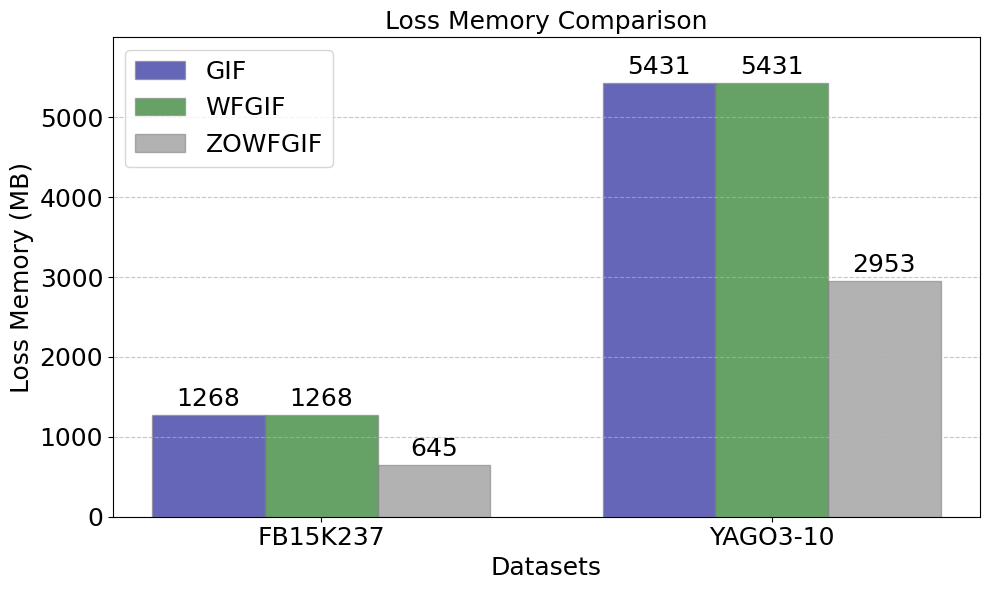

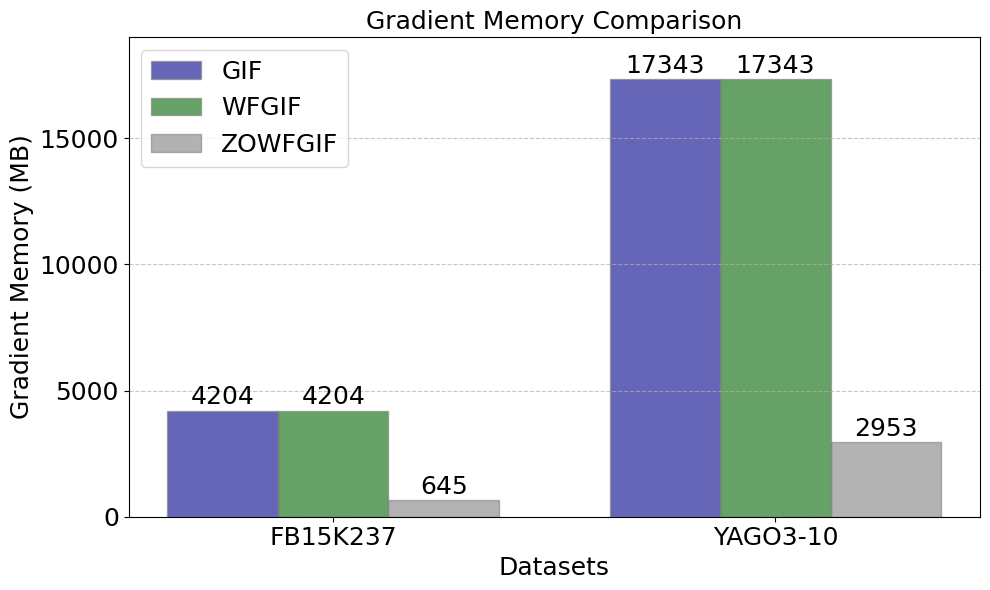

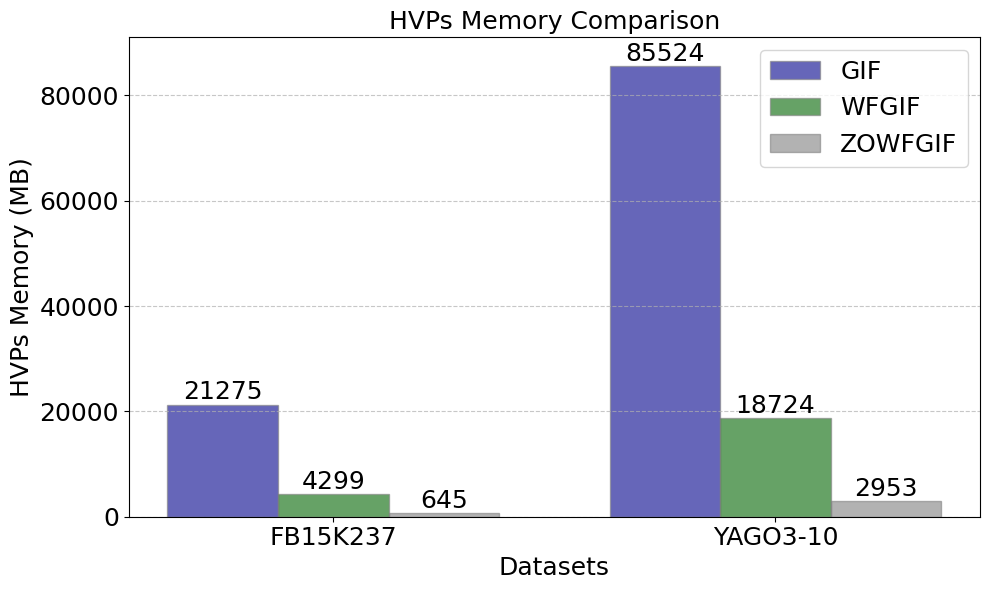

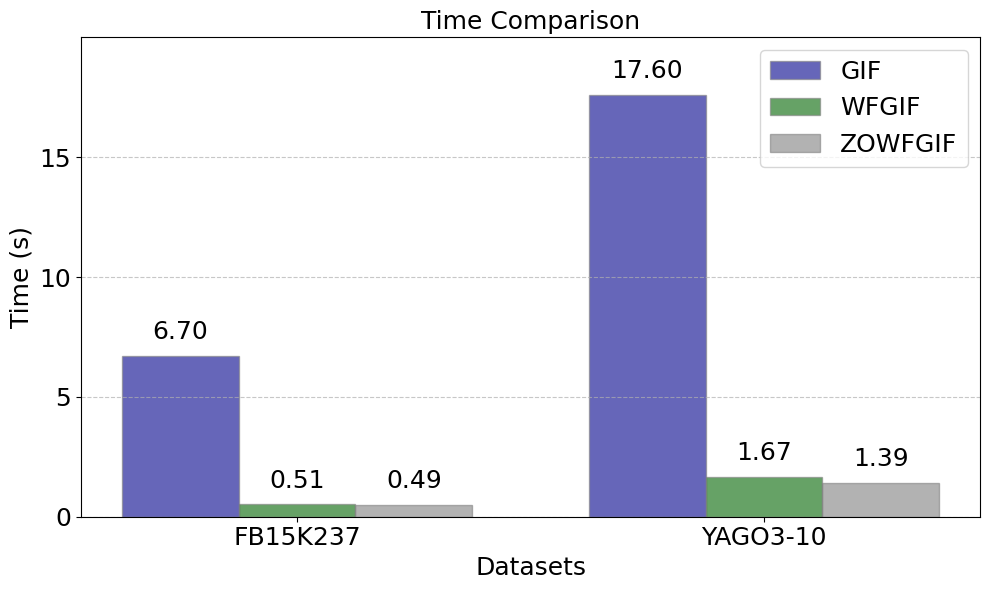

In [97]:
# 数据
datasets = ['FB15K237', 'YAGO3-10']
FB15K237_loss = [1268, 1268, 645]
YAGO3_10_loss = [5431, 5431, 2953]

data = [FB15K237_loss, YAGO3_10_loss]

bar_width = 0.25
r1 = np.arange(len(datasets))
r1 = [x - bar_width for x in r1]
r2 = np.arange(len(datasets))
r3 = [x + bar_width for x in r2]
color_alpha = 0.6

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(r1, [FB15K237_loss[0], YAGO3_10_loss[0]], color='darkblue', alpha=color_alpha, width=bar_width, edgecolor='grey', label='GIF')
bars2 = ax.bar(r2, [FB15K237_loss[1], YAGO3_10_loss[1]], color='darkgreen', alpha=color_alpha, width=bar_width, edgecolor='grey', label='WFGIF')
bars3 = ax.bar(r3, [FB15K237_loss[2], YAGO3_10_loss[2]], color='grey', alpha=color_alpha, width=bar_width, edgecolor='grey', label='ZOWFGIF')

ax.set_ylim(0, 6000)
ax.set_xlabel('Datasets', fontsize=18)
ax.set_ylabel('Loss Memory (MB)', fontsize=18)
ax.set_title('Loss Memory Comparison', fontsize=18)
ax.set_xticks(r2)
ax.set_xticklabels(datasets, fontsize=18)
ax.set_yticks(np.arange(0, 6000, 1000)) 
ax.set_yticklabels(np.arange(0, 6000, 1000), fontsize=18)  
ax.legend(prop={'size': 18})
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 50, int(yval), ha='center', va='bottom', fontsize=18)

plt.tight_layout()
plt.savefig('TransD_Loss_Ablation.pdf')
plt.show()

# 数据
datasets = ['FB15K237', 'YAGO3-10']
FB15K237_grad = [4204, 4204, 645]
YAGO3_10_grad = [17343, 17343, 2953]

data = [FB15K237_grad, YAGO3_10_grad]

bar_width = 0.25
r1 = np.arange(len(datasets))
r1 = [x - bar_width for x in r1]
r2 = np.arange(len(datasets))
r3 = [x + bar_width for x in r2]
color_alpha = 0.6

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(r1, [FB15K237_grad[0], YAGO3_10_grad[0]], color='darkblue', alpha=color_alpha, width=bar_width, edgecolor='grey', label='GIF')
bars2 = ax.bar(r2, [FB15K237_grad[1], YAGO3_10_grad[1]], color='darkgreen', alpha=color_alpha, width=bar_width, edgecolor='grey', label='WFGIF')
bars3 = ax.bar(r3, [FB15K237_grad[2], YAGO3_10_grad[2]], color='grey', alpha=color_alpha, width=bar_width, edgecolor='grey', label='ZOWFGIF')

ax.set_ylim(0, 19000)
ax.set_xlabel('Datasets', fontsize=18)
ax.set_ylabel('Gradient Memory (MB)', fontsize=18)
ax.set_title('Gradient Memory Comparison', fontsize=18)
ax.set_xticks(r2)
ax.set_xticklabels(datasets, fontsize=18)
ax.set_yticks(np.arange(0, 19000, 5000)) 
ax.set_yticklabels(np.arange(0, 19000, 5000), fontsize=18)  
ax.legend(prop={'size': 18})
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 50, int(yval), ha='center', va='bottom', fontsize=18)

plt.tight_layout()
plt.savefig('TransD_Gradient_Ablation.pdf')
plt.show()

# 数据
datasets = ['FB15K237', 'YAGO3-10']
FB15K237_hvps = [21275, 4299, 645]
YAGO3_10_hvps = [85524, 18724, 2953]

data = [FB15K237_grad, YAGO3_10_grad]

bar_width = 0.25
r1 = np.arange(len(datasets))
r1 = [x - bar_width for x in r1]
r2 = np.arange(len(datasets))
r3 = [x + bar_width for x in r2]
color_alpha = 0.6

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(r1, [FB15K237_hvps[0], YAGO3_10_hvps[0]], color='darkblue', alpha=color_alpha, width=bar_width, edgecolor='grey', label='GIF')
bars2 = ax.bar(r2, [FB15K237_hvps[1], YAGO3_10_hvps[1]], color='darkgreen', alpha=color_alpha, width=bar_width, edgecolor='grey', label='WFGIF')
bars3 = ax.bar(r3, [FB15K237_hvps[2], YAGO3_10_hvps[2]], color='grey', alpha=color_alpha, width=bar_width, edgecolor='grey', label='ZOWFGIF')

ax.set_ylim(0, 91000)
ax.set_xlabel('Datasets', fontsize=18)
ax.set_ylabel('HVPs Memory (MB)', fontsize=18)
ax.set_title('HVPs Memory Comparison', fontsize=18)
ax.set_xticks(r2)
ax.set_xticklabels(datasets, fontsize=18)
ax.set_yticks(np.arange(0, 91000, 20000)) 
ax.set_yticklabels(np.arange(0, 91000, 20000), fontsize=18)  
ax.legend(prop={'size': 18})
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 50, int(yval), ha='center', va='bottom', fontsize=18)

plt.tight_layout()
plt.savefig('TransD_HVPs_Ablation.pdf')
plt.show()

# 数据
datasets = ['FB15K237', 'YAGO3-10']
FB15K237_time = [6.7, 0.51, 0.49]
YAGO3_10_time = [17.6, 1.67, 1.39]

data = [FB15K237_grad, YAGO3_10_grad]

bar_width = 0.25
r1 = np.arange(len(datasets))
r1 = [x - bar_width for x in r1]
r2 = np.arange(len(datasets))
r3 = [x + bar_width for x in r2]
color_alpha = 0.6

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(r1, [FB15K237_time[0], YAGO3_10_time[0]], color='darkblue', alpha=color_alpha, width=bar_width, edgecolor='grey', label='GIF')
bars2 = ax.bar(r2, [FB15K237_time[1], YAGO3_10_time[1]], color='darkgreen', alpha=color_alpha, width=bar_width, edgecolor='grey', label='WFGIF')
bars3 = ax.bar(r3, [FB15K237_time[2], YAGO3_10_time[2]], color='grey', alpha=color_alpha, width=bar_width, edgecolor='grey', label='ZOWFGIF')

ax.set_ylim(0, 20)
ax.set_xlabel('Datasets', fontsize=18)
ax.set_ylabel('Time (s)', fontsize=18)
ax.set_title('Time Comparison', fontsize=18)
ax.set_xticks(r2)
ax.set_xticklabels(datasets, fontsize=18)
ax.set_yticks(np.arange(0, 20, 5)) 
ax.set_yticklabels(np.arange(0, 20, 5), fontsize=18)  
ax.legend(prop={'size': 18})
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, '{:.2f}'.format(yval), ha='center', va='bottom', fontsize=18)

plt.tight_layout()
plt.savefig('TransD_Time_Ablation.pdf')
plt.show()

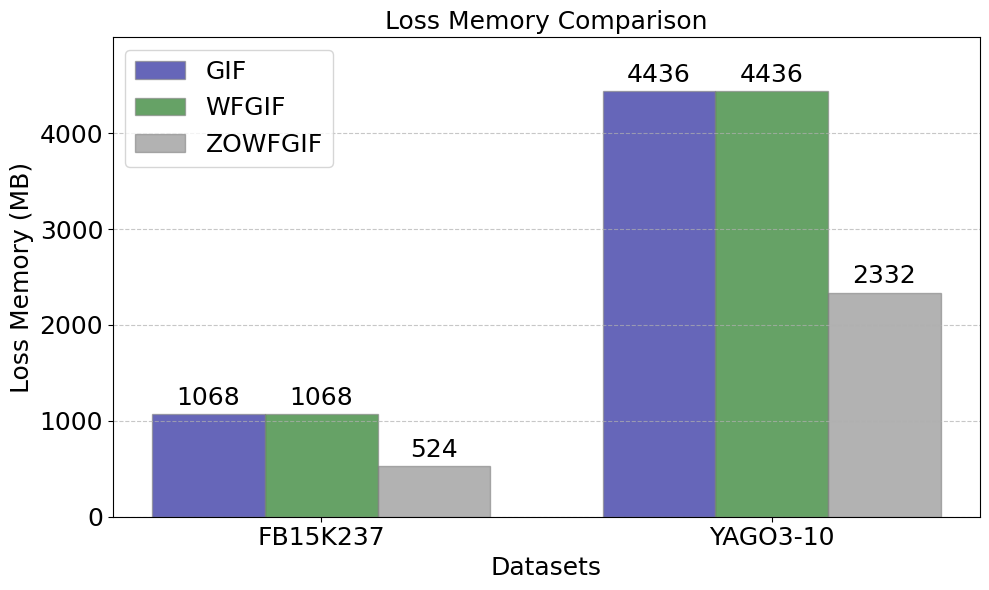

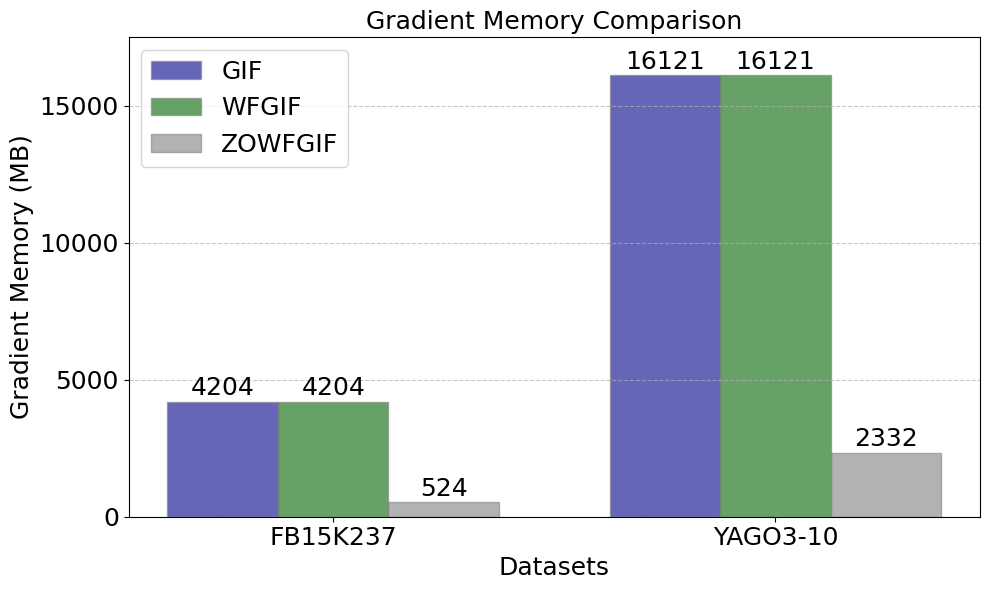

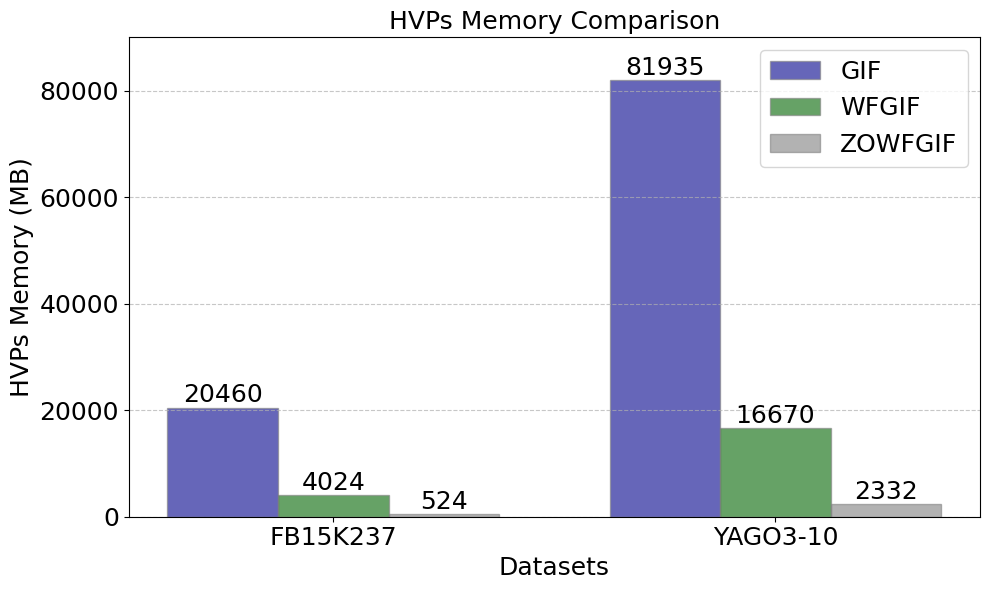

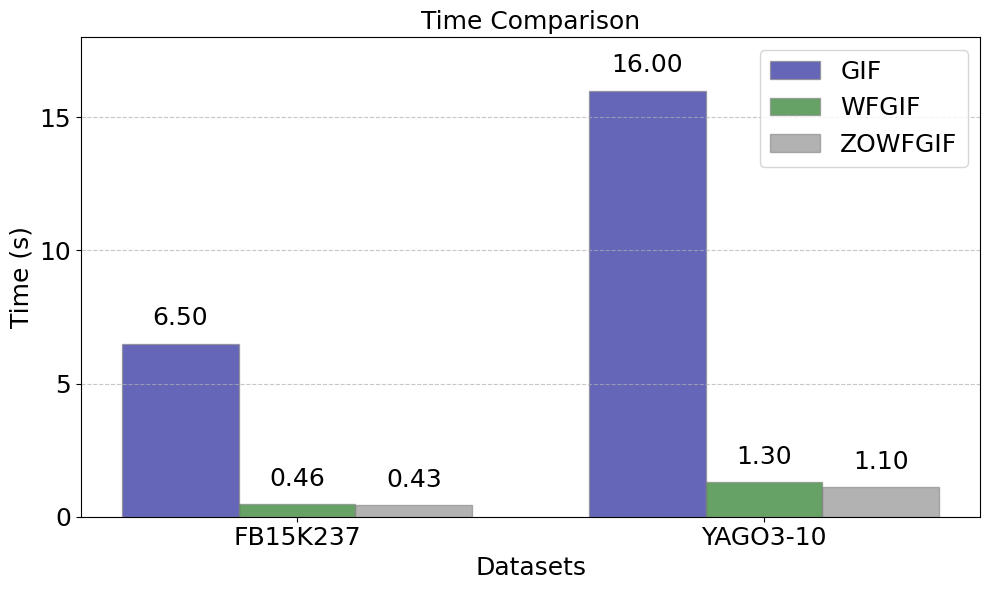

In [100]:
# 数据
datasets = ['FB15K237', 'YAGO3-10']
FB15K237_loss = [1068, 1068, 524]
YAGO3_10_loss = [4436, 4436, 2332]

data = [FB15K237_loss, YAGO3_10_loss]

bar_width = 0.25
r1 = np.arange(len(datasets))
r1 = [x - bar_width for x in r1]
r2 = np.arange(len(datasets))
r3 = [x + bar_width for x in r2]
color_alpha = 0.6

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(r1, [FB15K237_loss[0], YAGO3_10_loss[0]], color='darkblue', alpha=color_alpha, width=bar_width, edgecolor='grey', label='GIF')
bars2 = ax.bar(r2, [FB15K237_loss[1], YAGO3_10_loss[1]], color='darkgreen', alpha=color_alpha, width=bar_width, edgecolor='grey', label='WFGIF')
bars3 = ax.bar(r3, [FB15K237_loss[2], YAGO3_10_loss[2]], color='grey', alpha=color_alpha, width=bar_width, edgecolor='grey', label='ZOWFGIF')

ax.set_ylim(0, 5000)
ax.set_xlabel('Datasets', fontsize=18)
ax.set_ylabel('Loss Memory (MB)', fontsize=18)
ax.set_title('Loss Memory Comparison', fontsize=18)
ax.set_xticks(r2)
ax.set_xticklabels(datasets, fontsize=18)
ax.set_yticks(np.arange(0, 5000, 1000)) 
ax.set_yticklabels(np.arange(0, 5000, 1000), fontsize=18)  
ax.legend(prop={'size': 18})
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 50, int(yval), ha='center', va='bottom', fontsize=18)

plt.tight_layout()
plt.savefig('TransH_Loss_Ablation.pdf')
plt.show()

# 数据
datasets = ['FB15K237', 'YAGO3-10']
FB15K237_grad = [4204, 4204, 524]
YAGO3_10_grad = [16121, 16121, 2332]

data = [FB15K237_grad, YAGO3_10_grad]

bar_width = 0.25
r1 = np.arange(len(datasets))
r1 = [x - bar_width for x in r1]
r2 = np.arange(len(datasets))
r3 = [x + bar_width for x in r2]
color_alpha = 0.6

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(r1, [FB15K237_grad[0], YAGO3_10_grad[0]], color='darkblue', alpha=color_alpha, width=bar_width, edgecolor='grey', label='GIF')
bars2 = ax.bar(r2, [FB15K237_grad[1], YAGO3_10_grad[1]], color='darkgreen', alpha=color_alpha, width=bar_width, edgecolor='grey', label='WFGIF')
bars3 = ax.bar(r3, [FB15K237_grad[2], YAGO3_10_grad[2]], color='grey', alpha=color_alpha, width=bar_width, edgecolor='grey', label='ZOWFGIF')

ax.set_ylim(0, 17500)
ax.set_xlabel('Datasets', fontsize=18)
ax.set_ylabel('Gradient Memory (MB)', fontsize=18)
ax.set_title('Gradient Memory Comparison', fontsize=18)
ax.set_xticks(r2)
ax.set_xticklabels(datasets, fontsize=18)
ax.set_yticks(np.arange(0, 17500, 5000)) 
ax.set_yticklabels(np.arange(0, 17500, 5000), fontsize=18)  
ax.legend(prop={'size': 18})
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 50, int(yval), ha='center', va='bottom', fontsize=18)

plt.tight_layout()
plt.savefig('TransH_Gradient_Ablation.pdf')
plt.show()

# 数据
datasets = ['FB15K237', 'YAGO3-10']
FB15K237_hvps = [20460, 4024, 524]
YAGO3_10_hvps = [81935, 16670, 2332]

data = [FB15K237_grad, YAGO3_10_grad]

bar_width = 0.25
r1 = np.arange(len(datasets))
r1 = [x - bar_width for x in r1]
r2 = np.arange(len(datasets))
r3 = [x + bar_width for x in r2]
color_alpha = 0.6

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(r1, [FB15K237_hvps[0], YAGO3_10_hvps[0]], color='darkblue', alpha=color_alpha, width=bar_width, edgecolor='grey', label='GIF')
bars2 = ax.bar(r2, [FB15K237_hvps[1], YAGO3_10_hvps[1]], color='darkgreen', alpha=color_alpha, width=bar_width, edgecolor='grey', label='WFGIF')
bars3 = ax.bar(r3, [FB15K237_hvps[2], YAGO3_10_hvps[2]], color='grey', alpha=color_alpha, width=bar_width, edgecolor='grey', label='ZOWFGIF')

ax.set_ylim(0, 90000)
ax.set_xlabel('Datasets', fontsize=18)
ax.set_ylabel('HVPs Memory (MB)', fontsize=18)
ax.set_title('HVPs Memory Comparison', fontsize=18)
ax.set_xticks(r2)
ax.set_xticklabels(datasets, fontsize=18)
ax.set_yticks(np.arange(0, 90000, 20000)) 
ax.set_yticklabels(np.arange(0, 90000, 20000), fontsize=18)  
ax.legend(prop={'size': 18})
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 50, int(yval), ha='center', va='bottom', fontsize=18)

plt.tight_layout()
plt.savefig('TransH_HVPs_Ablation.pdf')
plt.show()

# 数据
datasets = ['FB15K237', 'YAGO3-10']
FB15K237_time = [6.5, 0.46, 0.43]
YAGO3_10_time = [16.0, 1.30, 1.10]

data = [FB15K237_grad, YAGO3_10_grad]

bar_width = 0.25
r1 = np.arange(len(datasets))
r1 = [x - bar_width for x in r1]
r2 = np.arange(len(datasets))
r3 = [x + bar_width for x in r2]
color_alpha = 0.6

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(r1, [FB15K237_time[0], YAGO3_10_time[0]], color='darkblue', alpha=color_alpha, width=bar_width, edgecolor='grey', label='GIF')
bars2 = ax.bar(r2, [FB15K237_time[1], YAGO3_10_time[1]], color='darkgreen', alpha=color_alpha, width=bar_width, edgecolor='grey', label='WFGIF')
bars3 = ax.bar(r3, [FB15K237_time[2], YAGO3_10_time[2]], color='grey', alpha=color_alpha, width=bar_width, edgecolor='grey', label='ZOWFGIF')

ax.set_ylim(0, 18)
ax.set_xlabel('Datasets', fontsize=18)
ax.set_ylabel('Time (s)', fontsize=18)
ax.set_title('Time Comparison', fontsize=18)
ax.set_xticks(r2)
ax.set_xticklabels(datasets, fontsize=18)
ax.set_yticks(np.arange(0, 20, 5)) 
ax.set_yticklabels(np.arange(0, 20, 5), fontsize=18)  
ax.legend(prop={'size': 18})
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, '{:.2f}'.format(yval), ha='center', va='bottom', fontsize=18)

plt.tight_layout()
plt.savefig('TransH_Time_Ablation.pdf')
plt.show()